<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('/content/winemag_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Unnamed:** Тут просто повторяется нумерация, так что мы потом снесем эту колонку, она нам не дает никакой информации

**country:** Страна, из которой произведено вино

**description:** Описание(запах, вкус)

**designation:**	Виноградник на территории винодельни, откуда взят виноград, из которого изготовлено вино

**points:**	Количество баллов, на которые винный энтузиаст оценил вино

**price:**	Стоимость бутылки вина

**province:**	Провинция или штат, из которого произведено вино

**region_1:**	Винодельческий район в провинции или штате (например, Напа)

**region_2:**	Иногда в пределах винодельческого района указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым

**taster_name:** Название вина

**taster_twitter_handle:** Аккаунт в твитере

**title:** Название обзора вина, в котором часто указывается год сбора винограда, если вы заинтересованы в извлечении этой характеристики

**variety:** Сорт винограда, используемый для приготовления вина (например, Пино Нуар)

**winery:** Винодельня, на которой производилось вино

In [10]:
df = df.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,15.0,Douro
2,US,87,14.0,Oregon
3,US,87,13.0,Michigan
4,US,87,65.0,Oregon
...,...,...,...,...
36164,Austria,92,20.0,Eisenberg
36165,US,88,20.0,California
36166,US,88,32.0,California
36167,Italy,88,18.0,Sicily & Sardinia


In [11]:
df.describe()

,points,price
count,36169.000000,33541.000000
mean,88.397274,34.928177
std,3.002518,39.293602
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


In [12]:
df['price'] = df['price'].apply(lambda x: 'Вери дешево' if x<=10.0 else 'Норм пойло' if x>10.0 and x<35.0 else 'Вери гуд бухлишко' if x>=35.0 else x)

In [13]:
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
36164,Austria,92,Норм пойло,Eisenberg
36165,US,88,Норм пойло,California
36166,US,88,Норм пойло,California
36167,Italy,88,Норм пойло,Sicily & Sardinia


In [14]:
df['price'] = df['price']. fillna ('Норм пойло')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36169 entries, 0 to 36168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   36153 non-null  object
 1   points    36169 non-null  int64 
 2   price     36169 non-null  object
 3   province  36153 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [16]:
df = df.dropna()
df
#Удалям наны

,country,points,price,province
0,Italy,87,Норм пойло,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
36164,Austria,92,Норм пойло,Eisenberg
36165,US,88,Норм пойло,California
36166,US,88,Норм пойло,California
36167,Italy,88,Норм пойло,Sicily & Sardinia


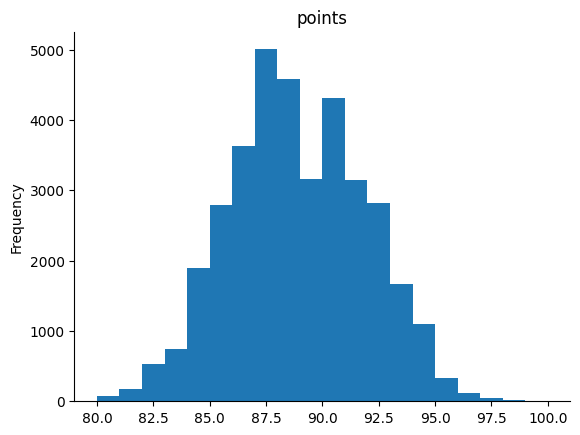

In [23]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

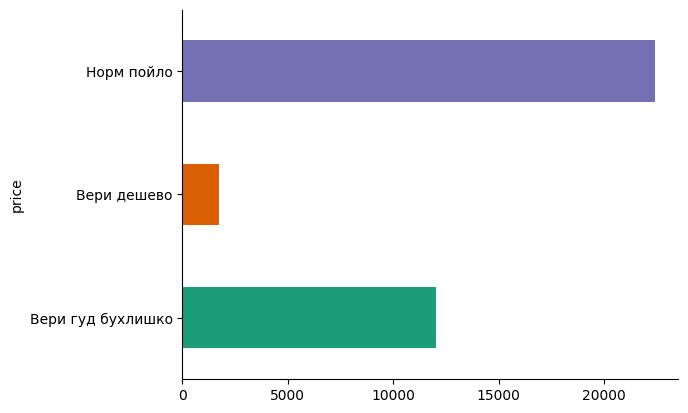

In [21]:
# @title price

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36153 entries, 0 to 36168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   36153 non-null  object
 1   points    36153 non-null  int64 
 2   price     36153 non-null  object
 3   province  36153 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [28]:
X=df.drop(columns=['price'])
Y = df['price']
X

,country,points,province
0,Italy,87,Sicily & Sardinia
1,Portugal,87,Douro
2,US,87,Oregon
3,US,87,Michigan
4,US,87,Oregon
...,...,...,...
36164,Austria,92,Eisenberg
36165,US,88,California
36166,US,88,California
36167,Italy,88,Sicily & Sardinia


**2.**


In [38]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['points']] = scaler.fit_transform(X[['points']])
X['country'] = le.fit_transform(X['country'])
X['province'] = le.fit_transform(X['province'])
Y=le.fit_transform(Y)

In [39]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2876.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:05:43   Log-Likelihood:                -44889.
No. Observations:               36153   AIC:                         8.979e+04
Df Residuals:                   36149   BIC:                         8.982e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5611      0.017    148.036      0.000       2.527       2.595
country       -0.0099      0.000    -28.244      0.000      -0.011      -0.009
points        -2.5569      0.029    -87.134      0.000      -2.614      -2.499
province       0.0004   3.97e-05      9.676      0.000       0.000       0.000
==============================================================================
Omnibus:                    18363.408   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2849.134
Skew:                          -0.396   Prob(JB):                         0.00
Kurtosis:                       1.876   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [40]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [43]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [46]:
X=df.drop(columns=['price'])
Y = df['price']
Y=le.fit_transform(Y)
X[['points']] = scaler.fit_transform(X[['points']])
X=pd.get_dummies (X, columns=['country'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [54]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

ValueError: could not convert string to float: 'Burgundy'